In [1]:
import nltk
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving Keyword_data.xlsx to Keyword_data.xlsx


In [3]:
df_keyword = pd.read_excel("Keyword_data.xlsx")
df_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       55 non-null     object
 1   Keyword 1   49 non-null     object
 2   Keyword 2   49 non-null     object
 3   Keyword 3   49 non-null     object
 4   Keyword 4   49 non-null     object
 5   Keyword 5   49 non-null     object
 6   Keyword 6   48 non-null     object
 7   Keyword 7   48 non-null     object
 8   Keyword 8   48 non-null     object
 9   Keyword 9   46 non-null     object
 10  Keyword 10  44 non-null     object
 11  Keyword 11  20 non-null     object
 12  Keyword 12  11 non-null     object
dtypes: object(13)
memory usage: 6.8+ KB


In [4]:
df_keyword.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,2020-02-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


In [5]:
vals = df_keyword.iloc[[2]].values[0]
# vals[~np.isnan(vals)]
[x for x in vals if not pd.isna(x)]

['Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?',
 'EQUITY',
 'ORGANIZATIONAL sociology',
 'PERFORMANCE',
 'META-analysis',
 'PSYCHOMETRICS',
 'ORGANIZATIONAL research',
 'FINANCIAL performance',
 'AGENCY theory',
 'ORGANIZATIONAL effectiveness',
 'ORGANIZATIONAL behavior',
 'CORPORATE governance']

In [6]:
# df_keyword.drop(colum)

In [7]:
keyword_matrix = []
title_list = []

for i in range(df_keyword.shape[0]):
  vals = df_keyword.iloc[[i]].values[0]
  if not pd.isna(vals[1]):
    cleaned_vals = [x for x in vals if not pd.isna(x)]
    title_list.append(cleaned_vals[0])
    keyword_matrix.append(cleaned_vals[1:])


In [8]:
stacked_keyword_list = []

for i in keyword_matrix:
  stacked_keyword_list+=i

stacked_keyword_list = list(set(stacked_keyword_list))


# stacked_keyword_list

In [9]:
adjacency_matrix = []

for i in range(len(stacked_keyword_list)):
  row = [0 for x in range(len(stacked_keyword_list))]
  for j in range(len(stacked_keyword_list)):
    for article in keyword_matrix:
      if stacked_keyword_list[i] in article and stacked_keyword_list[j] in article and i != j:
        row[j] += 1
  adjacency_matrix.append(row)


In [10]:
# np.array(adjacency_matrix)

In [11]:
matrix_df = pd.DataFrame(np.array(adjacency_matrix), columns=stacked_keyword_list, index=stacked_keyword_list)

In [12]:
matrix_df

,STRESS (Psychology),FOREIGN subsidiaries -- Management,GLOBALIZATION,INDUSTRIAL organization,MARKETING -- Decision making,EXECUTIVES -- Dismissal of,JUSTICE,RISK management in business,JOB satisfaction,INNOVATIONS in business,...,MUNICIPAL corporations,EMPLOYEE motivation,MANAGEMENT -- Employee participation,LABOR process,CORPORATE culture,OPTIONS (Finance),MATHEMATICAL statistics,CROSS-functional teams,PRODUCT information management,LABOR organizing
STRESS (Psychology),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOREIGN subsidiaries -- Management,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GLOBALIZATION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INDUSTRIAL organization,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MARKETING -- Decision making,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPTIONS (Finance),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MATHEMATICAL statistics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CROSS-functional teams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRODUCT information management,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
G = nx.from_pandas_adjacency(matrix_df)
G.remove_edges_from(nx.selfloop_edges(G))

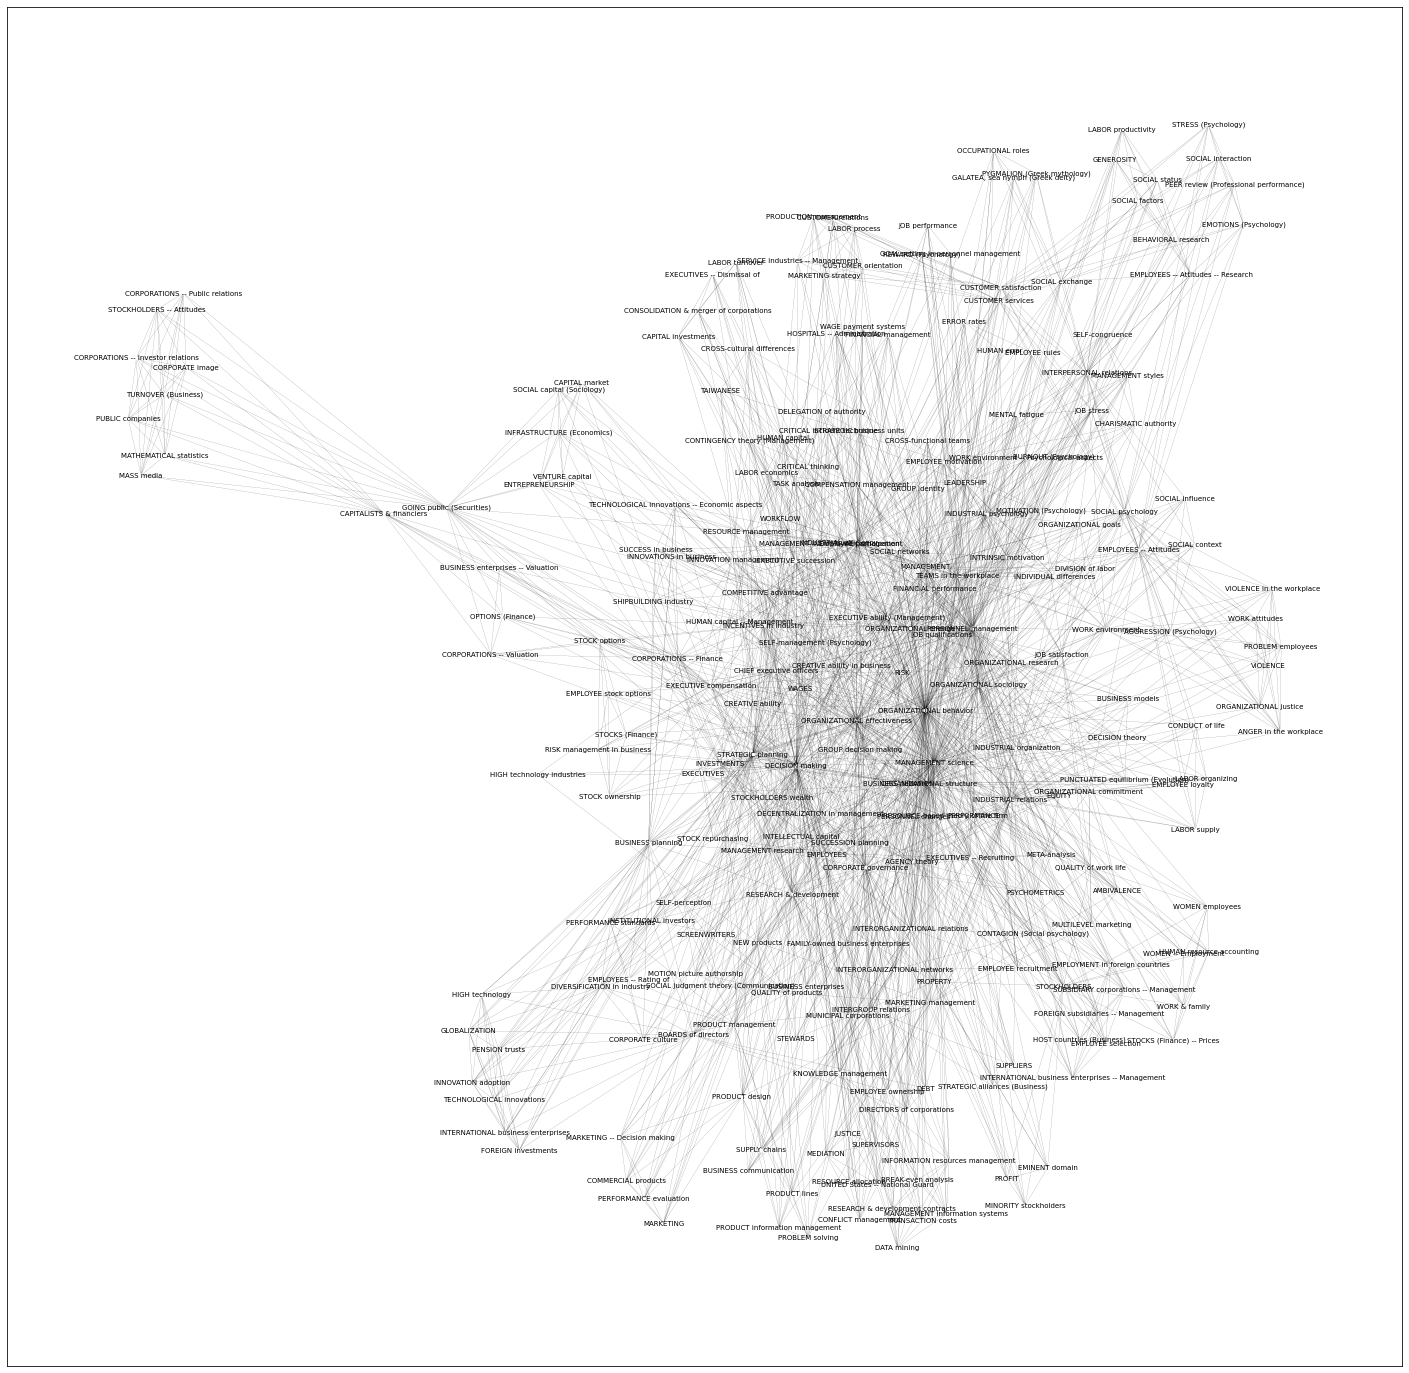

In [14]:

options = {
    "font_size": 7,
    "node_size": 10,
    "node_color": "white",
    "edgecolors": "white",
    "linewidths": 1,
    "width": 0.1,
}

fig, ax = plt.subplots(figsize=(25,25))
nx.draw_networkx(G, **options)
# nx.draw(G)

In [15]:
top_ten_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
print("Keyword : degree")
print()
for node, degree in top_ten_degree:
  print(node, ":", degree)

Keyword : degree

ORGANIZATIONAL behavior : 166
ORGANIZATIONAL effectiveness : 104
MANAGEMENT science : 102
PERSONNEL management : 93
DECISION making : 90
ORGANIZATIONAL structure : 74
STRATEGIC planning : 66
ORGANIZATIONAL sociology : 66
INDUSTRIAL management : 64
CORPORATE governance : 62


In [16]:
# sorted(G.strength, key=lambda x: x[1], reverse=True)[:10]

In [17]:
top_ten_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]

print("Top 10 node pairs by weight")
print()
for node1, node2, weight in top_ten_edges:
  print(node1, ",", node2)

Top 10 node pairs by weight

ORGANIZATIONAL behavior , ORGANIZATIONAL effectiveness
ORGANIZATIONAL behavior , ORGANIZATIONAL structure
ORGANIZATIONAL behavior , PERSONNEL management
ORGANIZATIONAL behavior , MANAGEMENT science
ORGANIZATIONAL behavior , ORGANIZATIONAL sociology
ORGANIZATIONAL behavior , CORPORATE governance
ORGANIZATIONAL behavior , DECISION making
ORGANIZATIONAL structure , ORGANIZATIONAL effectiveness
ORGANIZATIONAL behavior , INDUSTRIAL management
ORGANIZATIONAL behavior , INDUSTRIAL relations


In [18]:
top_ten_strength = sorted(G.degree(weight='weight'), key=lambda x: x[1], reverse=True)[:10]
print("Keyword : strength")
print()
for node, strength in top_ten_strength:
  print(node, ":", strength)

Keyword : strength

ORGANIZATIONAL behavior : 265
ORGANIZATIONAL effectiveness : 144
MANAGEMENT science : 136
PERSONNEL management : 126
DECISION making : 112
ORGANIZATIONAL structure : 107
ORGANIZATIONAL sociology : 96
CORPORATE governance : 85
INDUSTRIAL management : 84
STRATEGIC planning : 80


In [27]:
degrees = [degree for node, degree in G.degree]
strengths = [strength for node, strength in G.degree(weight='weight')]
#strengths.sort_values(by=['Strength'],ascending=False).head(10)

In [20]:
li = list(zip(degrees, strengths))

In [25]:
len(strengths)

248

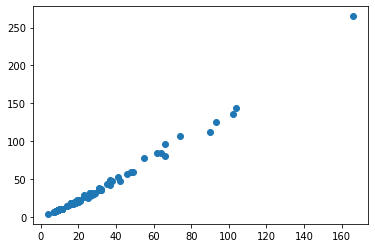

In [29]:
#Plotting degree vs strengths graph
plt.scatter(degrees, strengths)
# plt.plot(*zip(*li))
plt.show()

In [28]:
#plt.plot(degrees, strengths)
#plt.show()